### Decision Tree, Random Forest

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('iris_dane.csv',sep=',')

In [3]:
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
df['label'].unique()

array([0, 1, 2], dtype=int64)

**Decision Trees**

**Wersja 1 - tylko dane binarne (setosa=0, versicolor=1, virginica=2  >>>>   virginica=1, setosa,versicolor=2)**

In [5]:
# Przypisanie nowej wartości za pomocą funkcji

def labels2(x):
    if x==2:
        return 1
    else:
        return 2
df['labelB']=df['label'].apply(labels2)   

In [6]:
df.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label,labelB
0,5.1,3.5,1.4,0.2,0,2
1,4.9,3.0,1.4,0.2,0,2
2,4.7,3.2,1.3,0.2,0,2
3,4.6,3.1,1.5,0.2,0,2
4,5.0,3.6,1.4,0.2,0,2


In [7]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'label', 'labelB'],
      dtype='object')

**EDA**

In [8]:
df1=df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)', 'labelB']]

In [9]:
df1.head(4)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),labelB
0,5.1,3.5,1.4,0.2,2
1,4.9,3.0,1.4,0.2,2
2,4.7,3.2,1.3,0.2,2
3,4.6,3.1,1.5,0.2,2


C:\Users\CentrumGIS\AppData\Local\ESRI\conda\envs\progis\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\CentrumGIS\AppData\Local\ESRI\conda\envs\progis\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


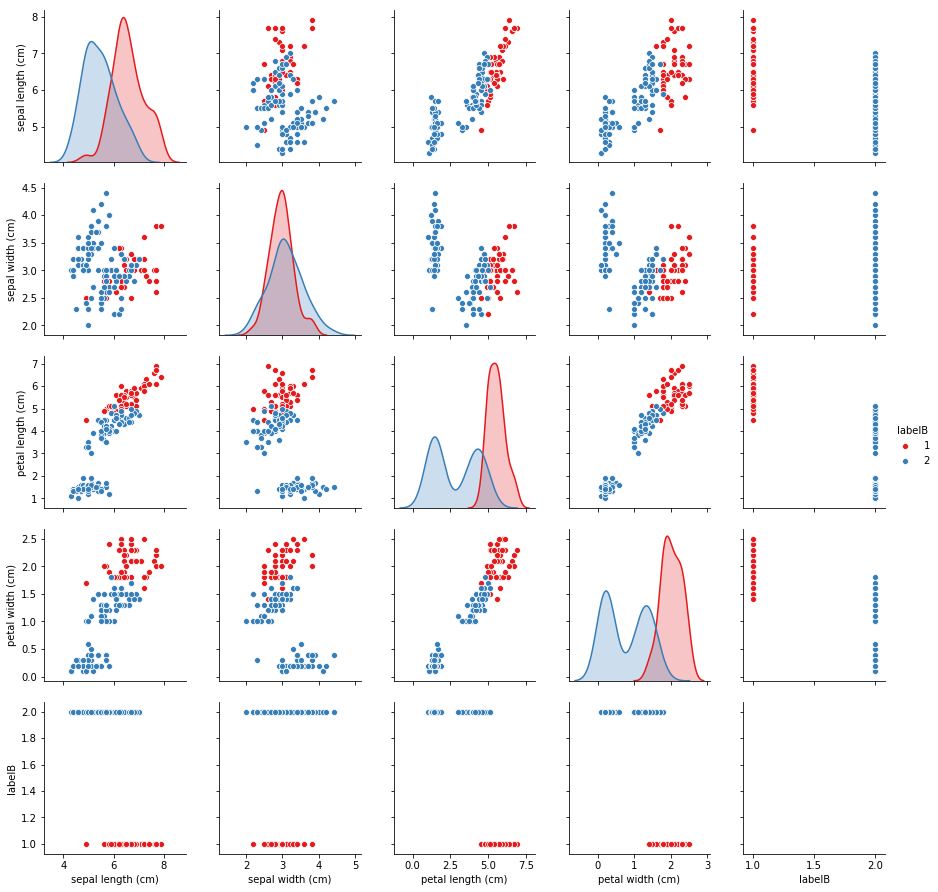

In [11]:
sns.pairplot(df1,hue='labelB',palette='Set1');

Dwie df (features, target)

In [12]:
df_feat=df1[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]
df_target=df1[['labelB']]

In [13]:
df_target[:4]

,labelB
0,2
1,2
2,2
3,2


**Podział na zbiory testowe i treningowe**

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(df_feat, 
                                    np.ravel(df_target), 
                                    test_size=0.30, 
                                    random_state=102)

In [16]:
y_test

array([2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2, 1,
       2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 1, 2, 2, 2,
       1], dtype=int64)

#### Decision Trees 

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
dtree = DecisionTreeClassifier()

In [19]:
clf =dtree.fit(X_train,y_train)

#### Prediction and Evaluation 

In [20]:
predictions = dtree.predict(X_test)

In [21]:
from sklearn.metrics import classification_report,confusion_matrix

In [22]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.93      0.88      0.90        16
           2       0.93      0.97      0.95        29

   micro avg       0.93      0.93      0.93        45
   macro avg       0.93      0.92      0.93        45
weighted avg       0.93      0.93      0.93        45



In [23]:
print(confusion_matrix(y_test,predictions))

[[14  2]
 [ 1 28]]


In [24]:
## Obliczenie błedu w inny sposób

errs_test = np.sum((predictions)  != y_test )
print ("Test error: ", float(errs_test)/len(y_test))

Test error:  0.06666666666666667


In [25]:

from sklearn.tree import export_graphviz
from sklearn import tree


In [26]:
tree.export_graphviz(clf,out_file='tree1a.dot',feature_names=['sL','sW','pL','pW'],
                    class_names=['1','2'])

**Wersja 2  - 3 klasy**

In [27]:
df_feat=df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)','petal width (cm)']]
df_target=df[['label']]

**Podział na zbiory testowe i treningowe**

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df_feat, 
                                    np.ravel(df_target), 
                                    test_size=0.30, 
                                    random_state=102)

#### Decision Trees 

In [29]:
dtree = DecisionTreeClassifier()
clf2=dtree.fit(X_train,y_train)

In [30]:
predictions = dtree.predict(X_test)

In [31]:
print(confusion_matrix(y_test,predictions))

[[17  0  0]
 [ 0 11  1]
 [ 0  2 14]]


#### Prediction and Evaluation 

In [32]:

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.85      0.92      0.88        12
           2       0.93      0.88      0.90        16

   micro avg       0.93      0.93      0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



In [33]:
## Compute errors

errs_test = np.sum((predictions)  != y_test )
print ("Test error: ", float(errs_test)/len(y_test))

Test error:  0.06666666666666667


In [34]:
tree.export_graphviz(clf2,out_file='tree2a.dot',feature_names=['sL','sW','pL','pW'],
                    class_names=['1','2','3'])

### Random Forest (dla 3)

In [35]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [36]:
rfc_pred = rfc.predict(X_test)

In [37]:
print(confusion_matrix(y_test,rfc_pred))

[[17  0  0]
 [ 0 11  1]
 [ 0  2 14]]


In [38]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        17
           1       0.85      0.92      0.88        12
           2       0.93      0.88      0.90        16

   micro avg       0.93      0.93      0.93        45
   macro avg       0.93      0.93      0.93        45
weighted avg       0.94      0.93      0.93        45



In [39]:
## Compute errors

errs_test = np.sum((predictions)  != y_test )
print ("Test error: ", float(errs_test)/len(y_test))

Test error:  0.06666666666666667
